In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
train_payment = pd.read_csv('./train_payment.csv')
train_activity = pd.read_csv('./train_activity.csv')
train_combat = pd.read_csv('./train_combat.csv')
train_trade = pd.read_csv('./train_trade.csv')
train_pledge = pd.read_csv('./train_pledge.csv')
train_label = pd.read_csv('./train_label_add.csv')
train_label = train_label.sort_values('acc_id')

In [5]:
feature_128 = pd.read_csv('./sorry.csv')

In [492]:
# 총결제량 20 초과
over_20 = pd.merge(feature_128, train_label[train_label['total_spent']>20], on='acc_id', how = 'inner')
over_10 = pd.merge(feature_128, train_label[train_label['total_spent']>10], on='acc_id', how = 'inner')

# 총결제량 20 이하  
under_20 = pd.merge(feature_128, train_label[(train_label['total_spent']<=20) & (train_label['total_spent']>0)], on='acc_id', how = 'inner')
# 총결제량 20 미만 10 이상
between_20 = pd.merge(feature_128, train_label[(train_label['total_spent']<20) & (train_label['total_spent']>=10)], on='acc_id', how = 'inner')
spent_0 = pd.merge(feature_128, train_label[train_label['total_spent']==0], on='acc_id', how = 'inner')


In [130]:
over_20.describe().T
# 잔존자일 확률이 매우 높음

,count,mean,std,min,25%,50%,75%,max
acc_id,1765.0,6.559224e+04,37223.290797,38.000000,33519.000000,64852.000000,97583.000000,1.304730e+05
class,1765.0,1.970425e+02,197.012903,0.000000,81.000000,139.000000,238.000000,1.351000e+03
temp_cnt,1765.0,5.526790e+00,7.579230,0.000000,0.959456,2.878367,6.716189,8.683073e+01
private_shop,1765.0,1.823460e+00,9.660866,0.000000,0.000000,0.000000,0.000000,8.964495e+01
level,1765.0,9.310487e+02,718.709366,0.000000,486.000000,653.000000,1099.000000,4.201000e+03
party_exp,1765.0,1.317461e+00,8.834337,0.000000,0.002798,0.066659,0.299663,2.397860e+02
pledge_cnt,1765.0,5.020211e+01,133.835115,0.000000,0.000000,0.192553,19.640378,1.444659e+03
random_attacker_cnt,1765.0,4.925178e+00,22.889205,0.000000,0.000000,0.000000,0.000000,3.963372e+02
random_defender_cnt,1765.0,5.881138e+00,13.251800,0.000000,0.000000,1.183064,5.915322,1.916564e+02
same_pledge_cnt,1765.0,9.254801e+00,28.077546,0.000000,0.000000,0.000000,6.199136,4.525369e+02


In [490]:
over_10.describe().T

,count,mean,std,min,25%,50%,75%,max
acc_id,5539.0,6.574378e+04,37273.220180,21.000000,33723.000000,65962.000000,97591.500000,1.304730e+05
class,5539.0,1.797281e+02,173.988544,0.000000,72.000000,133.000000,224.000000,1.720000e+03
temp_cnt,5539.0,4.947891e+00,7.138693,0.000000,0.959456,2.878367,5.996597,1.693439e+02
private_shop,5539.0,1.496461e+00,9.062110,0.000000,0.000000,0.000000,0.000000,8.987539e+01
level,5539.0,8.397400e+02,637.683115,0.000000,476.000000,624.000000,961.500000,4.201000e+03
party_exp,5539.0,1.867564e+00,9.339378,0.000000,0.002466,0.066487,0.373260,2.397860e+02
pledge_cnt,5539.0,3.828132e+01,114.563324,0.000000,0.000000,0.064184,10.943413,1.444659e+03
random_attacker_cnt,5539.0,4.142572e+00,22.900626,0.000000,0.000000,0.000000,0.000000,6.002004e+02
random_defender_cnt,5539.0,4.892235e+00,11.422452,0.000000,0.000000,1.183064,4.732258,1.916564e+02
same_pledge_cnt,5539.0,7.898051e+00,25.566749,0.000000,0.000000,0.000000,0.000000,5.021300e+02


In [256]:
a = under_20.describe().T
a.to_csv('./under_20.csv')

In [12]:
spent_0.describe().T
# 쓰는 돈은 많고 들어오는 돈은 적은 편
# 

,count,mean,std,min,25%,50%,75%,max
acc_id,16438.0,65141.849982,37439.589286,2.000000,32906.750000,65143.500000,97334.000000,1.304680e+05
class,16438.0,102.631646,94.106412,0.000000,28.000000,84.000000,149.000000,1.468000e+03
temp_cnt,16438.0,2.230159,23.429911,0.000000,0.000000,0.479728,1.439183,1.438224e+03
private_shop,16438.0,20.886570,35.499116,0.000000,0.000000,0.000000,43.205511,9.163435e+01
level,16438.0,335.113517,307.479562,0.000000,56.000000,355.000000,448.000000,4.783000e+03
party_exp,16438.0,7.925201,28.203716,0.000000,0.000000,0.000000,0.145474,2.935522e+02
pledge_cnt,16438.0,0.915404,17.078013,0.000000,0.000000,0.000000,0.000000,1.196330e+03
random_attacker_cnt,16438.0,0.323039,4.378481,0.000000,0.000000,0.000000,0.000000,3.023780e+02
random_defender_cnt,16438.0,4.389315,15.023003,0.000000,0.000000,0.000000,1.183064,3.028645e+02
same_pledge_cnt,16438.0,0.408046,3.645023,0.000000,0.000000,0.000000,0.000000,1.425801e+02


In [469]:
under_10.describe().T

,count,mean,std,min,25%,50%,75%,max
acc_id,3774.0,6.581466e+04,3.730127e+04,21.000000,33905.000000,66376.500000,97568.250000,1.304470e+05
class,3774.0,1.716306e+02,1.614946e+02,0.000000,68.000000,131.000000,219.000000,1.720000e+03
temp_cnt,3774.0,4.677155e+00,6.907458e+00,0.000000,0.959456,2.398639,5.756733,1.693439e+02
private_shop,3774.0,1.343533e+00,8.765210e+00,0.000000,0.000000,0.000000,0.000000,8.987539e+01
level,3774.0,7.970374e+02,5.913036e+02,0.000000,472.000000,611.000000,905.750000,3.747000e+03
party_exp,3774.0,2.124833e+00,9.556703e+00,0.000000,0.002261,0.066181,0.414799,1.596318e+02
pledge_cnt,3774.0,3.270628e+01,1.038872e+02,0.000000,0.000000,0.064184,8.151399,1.398061e+03
random_attacker_cnt,3774.0,3.776567e+00,2.289982e+01,0.000000,0.000000,0.000000,0.000000,6.002004e+02
random_defender_cnt,3774.0,4.429752e+00,1.042747e+01,0.000000,0.000000,1.183064,4.732258,1.490661e+02
same_pledge_cnt,3774.0,7.263535e+00,2.428160e+01,0.000000,0.000000,0.000000,0.000000,5.021300e+02


In [20]:
over = over_20.corr()
over['amount_spent_y'].sort_values(ascending=False)

amount_spent_y             1.000000
secession                  0.361493
item_amount_s              0.295510
login_clt                  0.286750
num_trade_s                0.279199
day_mean                   0.217177
total_spent                0.128596
playtime_clt               0.121428
stop                       0.070984
private_shop               0.055414
private_shop_count         0.036980
acc_id                     0.006149
std_same                   0.005900
solo_exp                   0.002297
acc_std_same              -0.001073
game_money_change         -0.001097
C_7                       -0.002699
item_amount_t             -0.003776
num_trade_t               -0.003776
party_exp                 -0.005627
quest_exp                 -0.007299
merchant                  -0.010646
enchant_count             -0.013206
enchant_count_count       -0.014304
C_5                       -0.014847
C_6                       -0.015073
exp_clt                   -0.018006
C_0                       -0

In [495]:
over10 = over_10.corr()
over10['amount_spent_y'].sort_values(ascending=False)

amount_spent_y             1.000000
secession                  0.286208
num_trade_s                0.249432
item_amount_s              0.235031
login_clt                  0.218328
day_mean                   0.141449
total_spent                0.133637
playtime_clt               0.116374
item_amount_t              0.109513
num_trade_t                0.090644
stop                       0.075840
private_shop               0.020743
private_shop_count         0.013419
acc_id                     0.008292
game_money_change         -0.002413
merchant                  -0.007457
enchant_count             -0.008071
quest_exp                 -0.008267
enchant_count_count       -0.009617
C_6                       -0.012322
C_7                       -0.012565
solo_exp                  -0.012884
std_attack                -0.014805
party_exp                 -0.015090
random_attacker_cnt       -0.016012
acc_std_attack            -0.016786
std_same                  -0.017195
C_0                       -0

In [21]:
under = under_20.corr()
under['amount_spent_y'].sort_values(ascending=False)

amount_spent_y             1.000000
total_spent                0.256883
day                        0.111880
amount_spent_x             0.092181
login_clt                  0.092045
secession                  0.074641
level_max                  0.061300
C_5                        0.047165
playtime_clt               0.046560
fishing_count              0.037685
fishing                    0.036909
stop                       0.036588
day_pledge                 0.028073
pledge_cnt_count           0.027747
quest_exp_count            0.027491
rich_monster               0.027238
char_max                   0.025754
pledge_combat_cnt          0.025002
day_mean                   0.024920
std_pledge                 0.024596
rich_monster_count         0.024448
acc_std_pledge             0.024103
combat_char_cnt            0.023839
p_same_pledge_cnt          0.023306
p_etc_cnt                  0.020541
same_pledge_cnt_count      0.019066
C_3                        0.018995
day_same                   0

In [493]:
between =  between_20.corr()
between['amount_spent_y'].sort_values(ascending=False)

amount_spent_y               1.000000
secession                    0.291798
num_trade_t                  0.254346
login_clt                    0.206524
item_amount_s                0.204465
num_trade_s                  0.204465
item_amount_t                0.182106
playtime_clt                 0.132480
day_mean                     0.115321
stop                         0.094195
total_spent                  0.054735
acc_id                       0.011584
game_money_change            0.006043
enchant_count               -0.003430
enchant_count_count         -0.004939
merchant                    -0.006771
quest_exp                   -0.007212
C_6                         -0.010460
acc_std_attack              -0.014152
random_attacker_cnt         -0.015131
std_attack                  -0.015360
private_shop                -0.016135
party_exp                   -0.017669
private_shop_count          -0.017894
random_attacker_cnt_count   -0.018528
day_attack                  -0.018592
solo_exp    

In [15]:
no_spent = spent_0.corr()
no_spent['total_spent'].sort_values(ascending=False)

acc_id                      NaN
class                       NaN
temp_cnt                    NaN
private_shop                NaN
level                       NaN
party_exp                   NaN
pledge_cnt                  NaN
random_attacker_cnt         NaN
random_defender_cnt         NaN
same_pledge_cnt             NaN
etc_cnt                     NaN
num_opponent                NaN
playtime                    NaN
npc_kill                    NaN
solo_exp                    NaN
quest_exp                   NaN
rich_monster                NaN
death                       NaN
revive                      NaN
exp_recovery                NaN
fishing                     NaN
game_money_change           NaN
enchant_count               NaN
forgive                     NaN
pledge_cnt_count            NaN
random_attacker_cnt_count   NaN
random_defender_cnt_count   NaN
temp_cnt_count              NaN
same_pledge_cnt_count       NaN
etc_cnt_count               NaN
                             ..
C_2     

In [18]:
# 실제 접속일  데이터
real_day = train_activity[['acc_id','day','playtime']]
real_day = real_day.groupby(['acc_id','day']).sum().reset_index()

# 전체 일자 데이터 (40000*28)
day = np.zeros(shape=(40000*28,2))

# acc_id 40000개 추출
acc_id = train_activity[['acc_id','playtime']]
acc_id = acc_id[['acc_id']].groupby('acc_id').sum().reset_index()
acc_id = acc_id.values

    # day에 acc_id와 1~28일 입력 후 데이터프레임으로 변환
for i in range(0,40000):
    for j in range(0,28):
        n = 28*i+j
        day[n][0] = acc_id[i]
        day[n][1] = j+1
day_df = DataFrame(day, columns=['acc_id','day'])

# 만든 데이터프레임에 실제 결제 데이터 merge
pay_count_df = pd.merge(day_df, train_payment[['acc_id','day','amount_spent']],on=['acc_id','day'],how='outer').fillna(0)

    # 편한 인덱싱을 위해 데이터프레임을 넘파이 배열로 바꿔줍니다.
pay_count_np = pay_count_df[['acc_id','amount_spent']].values

    # 열은 'acc_id + 28일' 이므로 29입니다.
pattern_np = np.zeros(shape=(40000,29))
for i in range(0,40000):
    for j in range(0,28):
            # 28번씩 반복된 day_pattern_np의 acc_id를 28번에 한 번씩 갱신해서 pattern_np에 입력합니다.
        pattern_np[i][0] = pay_count_np[i*28][0]
            # 각 acc_id마다 행으로 28 단위로 입력된 결제량을 열 방향으로 입력합니다. 
            # 0열은 acc_id를 입력하므로 j+1을 해줍니다.
        pattern_np[i][j+1] = pay_count_np[28*i+j][1]
        
train_activity['minus_char'] = np.where(train_activity['game_money_change']<0, 1, 0)
train_activity['plus_char'] = np.where(train_activity['game_money_change']>0, 1, 0)

# 활동시간 합치기 위한 df
act = train_activity[['acc_id', 'day','game_money_change','char_id','minus_char','plus_char','private_shop']].groupby(['acc_id', 'day']).sum().reset_index()

# 40000*28 데이터에 일별 유저의 활동시간이랑 결제 금액 merge
interval = pd.merge(day_df, act[['acc_id', 'day','game_money_change','minus_char','plus_char','private_shop']], on =['acc_id', 'day'], how = 'outer')
interval = pd.merge(interval, train_payment[['acc_id', 'day','amount_spent']], on =['acc_id', 'day'], how = 'outer').fillna(0)

# 활동시간이 있으면 1, 아니면 0
#interval['act'] = np.where(interval['playtime']>0, 1, 0)
# 결제 금액이 있으면 1, 아니면 0
#interval['pay'] = np.where(interval['amount_spent']>0, 1, 0)

# login은 안했는데 결제를 한 날은 1, 아니면 0
interval['minus_acc'] = np.where((interval['game_money_change']<0), 1, 0)
interval['plus_acc'] = np.where((interval['game_money_change']>0), 1, 0)
interval['minus_am'] = np.where((interval['game_money_change']<0), interval['game_money_change'], 0)
interval['plus_am'] = np.where((interval['game_money_change']>0), interval['game_money_change'], 0)
interval['diff_minus'] = np.where((interval['minus_char'] != interval['minus_acc']), 1, 0)
interval['diff_plus'] = np.where((interval['plus_char'] != interval['plus_acc']), 1, 0)


In [26]:
over_20_2 = pd.merge(interval, train_label[train_label['total_spent']>20], on='acc_id', how = 'inner')
under_20_2 = pd.merge(interval, train_label[train_label['total_spent']<=20], on='acc_id', how = 'inner')

In [106]:
over_20_2_R = over_20_2.corr()
over_20_2_R['amount_spent_y'].sort_values(ascending=False)

amount_spent_y       1.000000e+00
secession            3.614930e-01
total_spent          1.285961e-01
private_shop         4.868681e-02
acc_id               6.148879e-03
plus_am              1.237567e-05
day                  5.662609e-19
game_money_change   -1.412998e-03
minus_am            -1.861607e-03
amount_spent_x      -9.872683e-03
diff_plus           -2.480440e-02
diff_minus          -3.543758e-02
plus_char           -6.742069e-02
plus_acc            -6.967858e-02
minus_char          -7.422952e-02
minus_acc           -7.659197e-02
survival_time       -5.774416e-01
Name: amount_spent_y, dtype: float64

In [107]:
under_20_2_R = under_20_2.corr()
under_20_2_R['amount_spent_y'].sort_values(ascending=False)

amount_spent_y       1.000000e+00
total_spent          2.568830e-01
secession            7.464123e-02
amount_spent_x       2.271442e-02
acc_id               6.440077e-03
minus_am             3.812220e-03
game_money_change    3.005001e-04
day                  6.632739e-18
plus_am             -3.520871e-03
diff_minus          -7.982275e-03
diff_plus           -9.576918e-03
minus_char          -2.172169e-02
minus_acc           -2.489342e-02
plus_char           -2.706461e-02
plus_acc            -2.995268e-02
private_shop        -6.533436e-02
survival_time       -1.258814e-01
Name: amount_spent_y, dtype: float64

In [31]:
testing = pd.merge(feature_128, train_label[['acc_id','total_spent']], on='acc_id', how = 'inner')

In [33]:
total_20 = train_label[['acc_id','total_spent']]
total_20['over_20'] = np.where(total_20['total_spent']>20, 1, 0)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [367]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(over_20[over_20.columns[1:]].drop(['total_spent','amount_spent_y','survival_time'], axis=1), over_20['amount_spent_y'], test_size=0.3, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#X_valid.shape, y_valid.shape

((1235, 129), (530, 129), (1235,), (530,))

In [135]:
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'rmse',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 500,
    'n_estimators': 200,
    'max_leaves': 300,
    'objective':'reg:squarederror'
}

In [136]:
VALID = True
if VALID == True:

    tr_data = xgb.DMatrix(X_train, y_train)
    #va_data = xgb.DMatrix(X_valid, y_valid)

    #del X_train, X_valid, y_train, y_valid  ; gc.collect()

    #watchlist = [(tr_data, 'train'), (va_data, 'valid')]

    model = xgb.train(params, tr_data, 500, maximize=False, 
                      verbose_eval=50)

-----------

128개 변수로 총결제량 20 이상 유저의 월평균 결제량 예측

In [126]:
y_pred2 = model.predict(xgb.DMatrix(X_test))
t2 = y_test.reset_index()
t2['pred'] = y_pred2

2.00597758459981


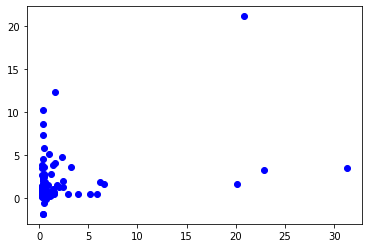

In [127]:
plt.plot(t2['amount_spent_y'],t2['pred'],'bo')
linreg_RMSE = np.sqrt(mse(t2['pred'], t2['amount_spent_y']))
print(linreg_RMSE)

---------------

잔존 여부를 안다고 했을 때, 이를 집어넣어서 20 이상 유저들 일평균결제량 예측 결과

1.5107219108134817


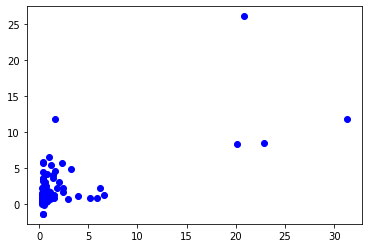

In [137]:
# 잔존여부를 알 경우
y_pred_se = model.predict(xgb.DMatrix(X_test))
t_se = y_test.reset_index()
t_se['pred'] = y_pred_se

plt.plot(t_se['amount_spent_y'],t_se['pred'],'bo')
linreg_RMSE = np.sqrt(mse(t_se['pred'], t_se['amount_spent_y']))
print(linreg_RMSE)
# 1.5107219108134817 -> rmse가 0.6이나 감소


--------------

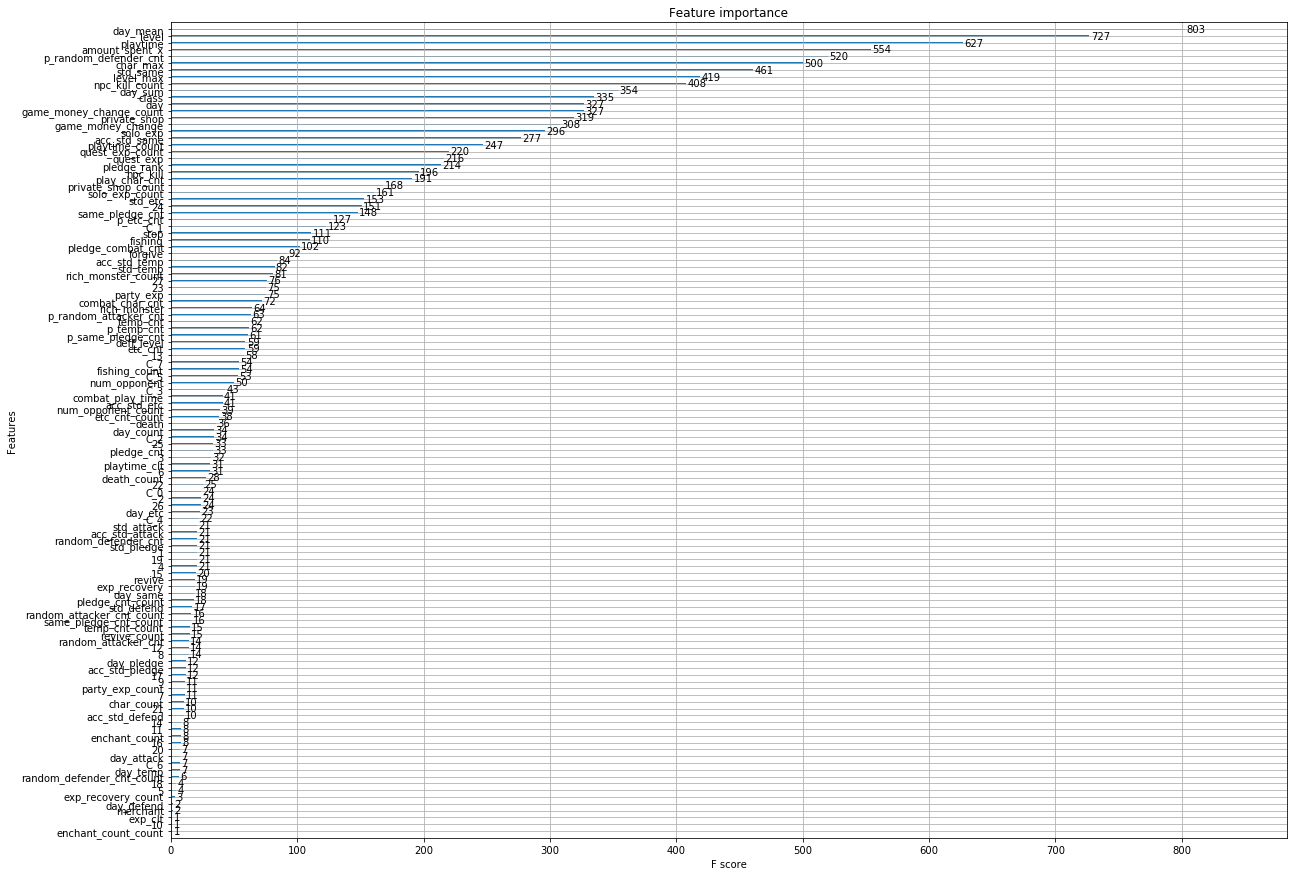

In [108]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_importance(model, ax=ax)
plt.show()

---------

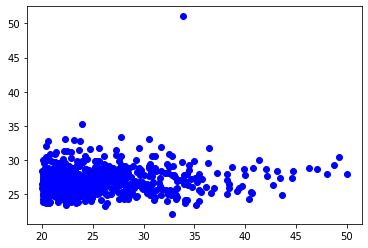

In [98]:
plt.plot(t2['total_spent'],t2['pred'],'bo')

In [90]:
y_pred = np.where(model.predict(xgb.DMatrix(X_test)) > 0.293, 1, 0)
t = y_test.reset_index()
t['pred'] = y_pred

---------------------

over 20 대상으로 feature selection 실시

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:25:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
X_train.shape : (1235, 129)
X_train_s1.shape : (1235, 24)
[ True False  True  True False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False  True  True  True False False  True
 False False False False False  True False False False False False False
  True False False False  True False False False False False False  True
 False False  True False False False False  True False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True  True False False False False False False False False
  True False False  True False False False False False False False False
 False False  True False False False False False

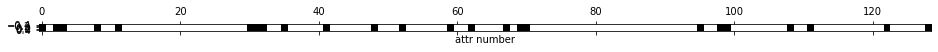

In [426]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(xgb.XGBRegressor(max_depth=30, n_estimators=200), threshold="0.15*mean")
select.fit(X_train,y_train)

X_train_s1 = select.transform(X_train)
X_test_s1 = select.transform(X_test)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_s1.shape : {}".format(X_train_s1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [427]:
xgb20=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb20.fit(X_train_s1,y_train)
y_pred3 = xgb20.predict(X_test_s1)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:25:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [424]:
t3 = y_test.reset_index()
t3['pred'] = y_pred3

1.8022505604960248

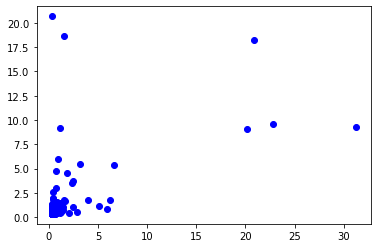

In [425]:
plt.plot(t3['amount_spent_y'],t3['pred'],'bo')
from sklearn.metrics import mean_squared_error as mse
linreg_RMSEk = np.sqrt(mse(t3['pred'], t3['amount_spent_y']))
linreg_RMSEk
# 2.0244591722854484 --> median
# 1.8485173275206421 --> 0.3 mean
# 1.801657111081908 --> 0.2 mean
# 1.8022505604960248 --> 0.17 mean (feature = 23)
#### 1.8010368228542548 --> 0.15, 0.145, 0.14, 0.135 mean, 결정 (feature = 24)
# 1.9005068535658673 --> 0.134 mean (feature = 25)
# 1.8106214701092282 --> 0.13 mean (feature = 26)
# 1.894994496131579 --> 0.1 mean

-----------------

결제량이 0에 가까운 유저의 변차를 많이 줄였기에, 전체 유저 대상으로 특징 추출해서 일평균 결제량 예측해봄

In [141]:
data = pd.merge(feature_128, train_label[['acc_id','amount_spent','total_spent']], on = 'acc_id')

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:]].drop(['total_spent','amount_spent_y'], axis=1), data['amount_spent_y'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28000, 128), (12000, 128), (28000,), (12000,))

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:27:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
X_train.shape : (28000, 128)
X_train_s1.shape : (28000, 64)
[ True  True  True  True False  True False  True  True False False  True
  True  True  True  True False False False  True  True  True False False
 False False False False False False  True  True  True False  True False
  True False False False  True  True False  True  True False  True  True
 False False  True False False  True  True False  True  True  True  True
  True False False False  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False  True False False  True False False False False  True  True
 False False  True  True  True  True  True  True  True  True False  True
  True False  True  True  True False False  True False False  True False
  True False  True False False  True False  Tr

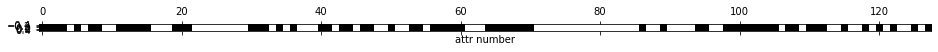

In [144]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(xgb.XGBRegressor(max_depth=30, n_estimators=200), threshold="median")
select.fit(X_train,y_train)

X_train_s1 = select.transform(X_train)
X_test_s1 = select.transform(X_test)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_s1.shape : {}".format(X_train_s1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [145]:
xgb20=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb20.fit(X_train_s1,y_train)
y_pred__all = xgb20.predict(X_test_s1)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:32:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [146]:
t_all = y_test.reset_index()
t_all['pred'] = y_pred__all

0.9295292232094519


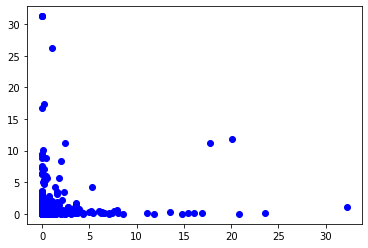

In [147]:
from sklearn.metrics import mean_squared_error as mse
plt.plot(t_all['amount_spent_y'],t_all['pred'],'bo')
linreg_RMSE = np.sqrt(mse(t_all['pred'], t_all['amount_spent_y']))
print(linreg_RMSE)
# 

------

over 20인 애들로만 돌렸을 때 추출된 특징으로만 학습하면 다를까?

In [151]:
select=[ True,  True,  True,  True, False,  True, False,  True,  True, False, False,  True,
  True,  True,  True, False, False,  True,  True,  True,  True, False,  True, False,
 False, False, False, False, False, False,  True,  True,  True, False,  True,  True,
 False,  True, False,  True, False,  True, False,  True, False,  True,  True,  True,
  True, False, False, False,  True, False,  True, False,  True,  True, False,  True,
  True, False,  True, False, False,  True,  True,  True,  True, False,  True, False,
 False, False, False, False,  True, False, False, False,  True, False, False, False,
  True,  True,  True,  True, False, False, False, False, False,  True,  True,  True,
 False, False,  True,  True, False,  True, False,  True,  True,  True, False,  True,
  True, False, False,  True, False, False, False, False, False, False,  True, False,
  True, False, False, False, False,  True,  True,  True]

In [167]:
columns = []
for i in range(len(select)):
    if select[i] == True:
        columns.append(i+1)

In [174]:
cols = data.columns[[columns]]
cols = list(cols)

In [180]:
over20_select = data[cols]

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(over20_select, data['amount_spent_y'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28000, 64), (12000, 64), (28000,), (12000,))

In [183]:
xgb20=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb20.fit(X_train,y_train)
y_pred_oversel = xgb20.predict(X_test)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:51:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8018998550572393


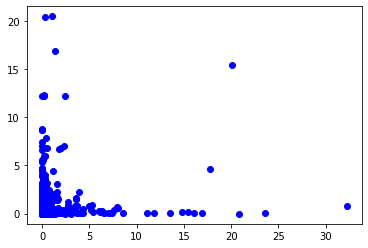

In [184]:
from sklearn.metrics import mean_squared_error as mse

t_sel = y_test.reset_index()
t_sel['pred'] = y_pred_oversel

plt.plot(t_sel['amount_spent_y'],t_sel['pred'],'bo')
linreg_RMSE_sel = np.sqrt(mse(t_sel['pred'], t_sel['amount_spent_y']))
print(linreg_RMSE_sel)
# rmse가 0.1 낮아졌다..!!

In [191]:
# 모델 저장
import pickle
pickle.dump(xgb20, open("xg_amount_over20select.pickle.dat", "wb"))

train에서 사전 평가

In [192]:
# load model from file
xg_20 = pickle.load(open("xg_amount_over20select.pickle.dat", "rb"))

[15:18:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [193]:
pred_for_test =xg_20.predict(over20_select)

In [236]:
train_pred = pd.read_csv('./train_label.csv')

In [238]:
train_pred['amount_spent'] = pred_for_test

In [239]:
train_pred['amount_spent'] = np.where(train_pred['amount_spent']<0, 0, train_pred['amount_spent'])

In [241]:
train_pred.to_csv('xg_amount_over20select2.csv', index=False)

In [244]:
# score 함수에 적용해보기
from score_function import score_function
print(score = score_function('./xg_amount_over20select2.csv', './train_label.csv'))
# 진짜 생존기간과의 콤비는 낮음

9198.956053015114


In [245]:
score = score_function('./xg_amount_over20select.csv', './train_label.csv')
# 예측 생존기간과는 높게 나옴

66678.62039816905


test 해보기

In [202]:
# 결과가 잘 나와서 테스트해볼 생각
test1 = pd.read_csv('test1_129features.csv')
test2 = pd.read_csv('test2_129features.csv')

In [219]:
# 128 특성 생존기간 모델
rnd_surv_128 = pickle.load(open("rnd_all_feature_surv_0828.pickle.dat", "rb"))

In [220]:
# 생존기간 예측
test1_pred_surv = rnd_surv_128.predict(test1[test1.columns[1:]])
test2_pred_surv = rnd_surv_128.predict(test2[test2.columns[1:]])

In [223]:
# 모델에 맞게 컬럼명 변경
test1_rename = test1.rename(columns={'amount_spent':'amount_spent_x'})
test2_rename = test2.rename(columns={'amount_spent':'amount_spent_x'})

In [225]:
# 월평균 결제량 예측
amount_for_test1 =xg_20.predict(test1_over20_select)
amount_for_test2 =xg_20.predict(test2_over20_select)

In [233]:
test1_predict = test1[['acc_id']]
test1_predict['survival_time'] = test1_pred_surv
test1_predict['amount_spent'] = amount_for_test1
test1_predict['amount_spent'] = np.where(test1_predict['amount_spent']<0, 0, test1_predict['amount_spent'])

test2_predict = test2[['acc_id']]
test2_predict['survival_time'] = test2_pred_surv
test2_predict['amount_spent'] = amount_for_test2
test2_predict['amount_spent'] = np.where(test2_predict['amount_spent']<0, 0, test2_predict['amount_spent'])


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [234]:
test1_predict.to_csv('./총결제20이상유저기준_feture_select/test1_predict.csv', index=False)
test2_predict.to_csv('./총결제20이상유저기준_feture_select/test2_predict.csv', index=False)


테스트 결과

생존기간 128 피처,모든 유저로 특징 선택으로 한 결과 : 933, 953 = 1886

생존기간 128 피처, 총결제량 20이상 유저로 특징 선택으로 한 결과 : 1370, 1093 = 2464

==> 이전의 테스트 파일과 비교해본 결과 결제량을 매우 보수적으로 잡는다

-------

64일 동안 결제량이 0인 애들만 분류하기 - 변수별로 값의 유무 여부(0,1)를 가지고 만든 변수를 사용하여 시간에 강건한 편

In [344]:
# describe에서 4분위 비교해서 0이 더 많은 컬럼들 가져옴
spent_0_cols=['private_shop', 'party_exp','pledge_cnt','random_defender_cnt','etc_cnt','num_opponent','npc_kill','solo_exp'
,'quest_exp','rich_monster','death','revive','fishing','forgive','temp_cnt_count','etc_cnt_count','num_opponent_count','npc_kill_count','solo_exp_count','party_exp_count','quest_exp_count','rich_monster_count','death_count','revive_count','fishing_count','private_shop_count','playtime_clt','day_temp','day_etc','std_defend','std_temp','std_etc','acc_std_temp','acc_std_etc','C_0','C_5','day','play_char_cnt','combat_char_cnt','pledge_combat_cnt','p_random_attacker_cnt','p_random_defender_cnt','p_same_pledge_cnt','p_temp_cnt','p_etc_cnt','combat_play_time','pledge_rank']

In [262]:
spent_0_df = feature_128[spent_0_cols]

In [263]:
spent_0_df = feature_128[spent_0_cols]
for col in spent_0_cols:
    spent_0_df[str(col) + '_count'] = np.where(spent_0_df[col]==0, 0, 1)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [266]:
spent_0_df = spent_0_df.drop(spent_0_cols, axis=1)
spent_0_df_acc = pd.concat([feature_128[['acc_id']],spent_0_df], axis=1)

In [273]:
spent_0_df_acc.head()

,acc_id,pledge_cnt_count,random_defender_cnt_count,forgive_count,temp_cnt_count_count,etc_cnt_count_count,num_opponent_count_count,npc_kill_count_count,solo_exp_count_count,party_exp_count_count,...,play_char_cnt_count,combat_char_cnt_count,pledge_combat_cnt_count,p_random_attacker_cnt_count,p_random_defender_cnt_count,p_same_pledge_cnt_count,p_temp_cnt_count,p_etc_cnt_count,combat_play_time_count,pledge_rank_count
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,1,1,0,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
2,8,1,0,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,17,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,20,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [268]:
# 결제량 0이면 1, 아니면 0
train_label['spent_0'] = np.where(train_label['amount_spent']==0, 1, 0)

In [471]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spent_0_df_acc[spent_0_df_acc.columns[1:]], train_label['spent_0'], test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 36), (12000, 36), (21000,), (12000,))

In [278]:
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'auc',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 500,
    'n_estimators': 200,
    'max_leaves': 300
}

In [472]:
VALID = True
if VALID == True:

    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)

    

    watchlist = [(tr_data, 'train'), (va_data, 'valid')]

    model_0 = xgb.train(params, tr_data, 500, watchlist, maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.900066	valid-auc:0.873335
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.92757	valid-auc:0.888594
Stopping. Best iteration:
[30]	train-auc:0.924019	valid-auc:0.889319



Booster 0.8200833333333334
Booster 0.7542961192670992
[0.7958785513961713, 0.8723348249539352]
1차 제거될 비과금 유저 비율 :  0.7616279069767442
실제 비과금 유저 수 :  4988
1차 제거될 비과금 유저 수 :  3799


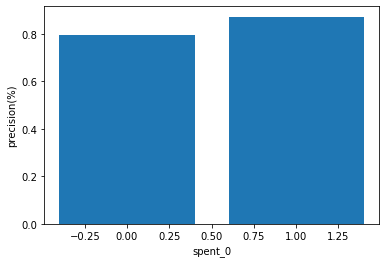

In [473]:
# 민감도 분석

y_pred_spent_0 = np.where(model_0.predict(xgb.DMatrix(X_test)) > 0.60, 1, 0)

# 민감도, 재현성 비교를 위해 실제 값과 예측값을 하나의 df로 만듦
pred_spent_0 = y_test.reset_index()
pred_spent_0['spent_0_pred'] = y_pred_spent_0


aa = []
for i in range(0,2):
    cc = np.where((pred_spent_0['spent_0']==i) & (pred_spent_0['spent_0_pred']==i), 1, 0).sum() / pred_spent_0[pred_spent_0['spent_0_pred']==i]['spent_0'].count()
    aa.append(cc)

aanp = np.array(aa)
x = np.arange(0,2)
plt.bar(x,aa)
plt.xlabel('spent_0')
plt.ylabel('precision(%)')
print(model.__class__.__name__, accuracy_score(y_test, y_pred_spent_0))
print(model.__class__.__name__, f1_score(y_test, y_pred_spent_0))
print(aa)
print('1차 제거될 비과금 유저 비율 : ', pred_spent_0[pred_spent_0['spent_0_pred']==1]['spent_0_pred'].count() / pred_spent_0[pred_spent_0['spent_0']==1]['spent_0'].count())
print('실제 비과금 유저 수 : ',pred_spent_0[pred_spent_0['spent_0']==1]['spent_0'].count())
print('1차 제거될 비과금 유저 수 : ',pred_spent_0[pred_spent_0['spent_0_pred']==1]['spent_0_pred'].count())

In [330]:
pred_spent_0.shape

(12000, 3)

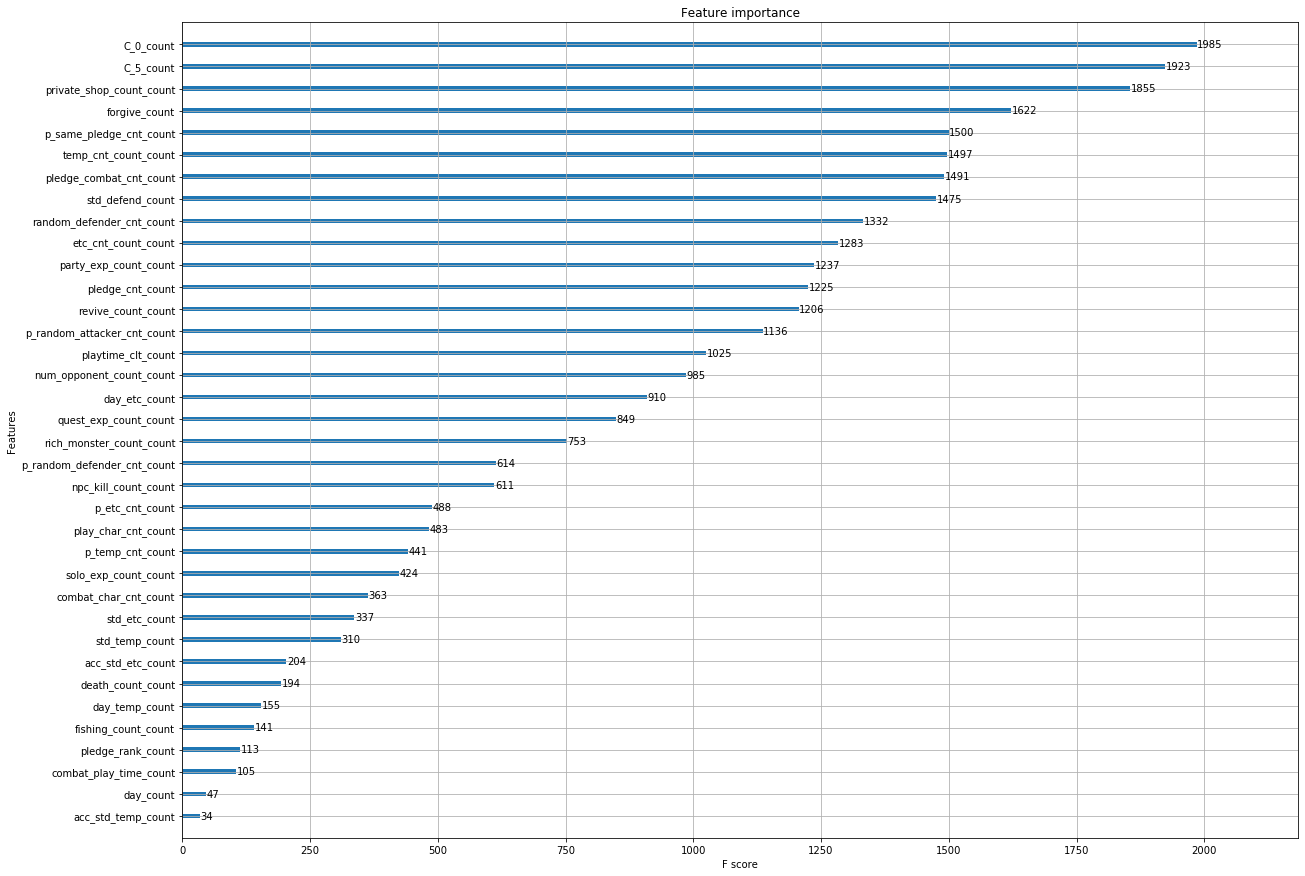

In [313]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_importance(model, ax=ax)
plt.show()

----------

총결제량 10이상 여부 분류하는 모델

In [432]:
total_10 = train_label[['acc_id','total_spent']]
total_10['over_10'] = np.where(total_20['total_spent']>=10, 1, 0)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [434]:
from sklearn.model_selection import train_test_split

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(feature_128[feature_128.columns[1:]], total_10['over_10'], test_size=0.3, random_state=42)
X_train_10, X_valid_10, y_train_10, y_valid_10 = train_test_split(X_train_10, y_train_10, test_size=0.25, random_state=42)

X_train_10.shape, X_test_10.shape, y_train_10.shape, y_test_10.shape

((21000, 128), (12000, 128), (21000,), (12000,))

In [436]:
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'auc',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 500,
    'n_estimators': 200,
    'max_leaves': 300
}

In [437]:
VALID = True
if VALID == True:

    tr_data_10 = xgb.DMatrix(X_train_10, y_train_10)
    va_data_10 = xgb.DMatrix(X_valid_10, y_valid_10)

    

    watchlist = [(tr_data_10, 'train'), (va_data_10, 'valid')]

    model_10 = xgb.train(params, tr_data_10, 500, watchlist, maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.95172	valid-auc:0.787078
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.998719	valid-auc:0.852784
[100]	train-auc:0.999522	valid-auc:0.854543
Stopping. Best iteration:
[97]	train-auc:0.999522	valid-auc:0.854706



Booster 0.8481666666666666
Booster 0.5250260688216892
[0.9307825027910281, 0.4690265486725664]
1차 분류될 총결제량 10 이하인 유저 비율 :  0.9555814179032102
실제 총결제량 10 이하인 유저 수 :  10311
1차 분류될 총결제량 10 이하인 유저 수 :  9853


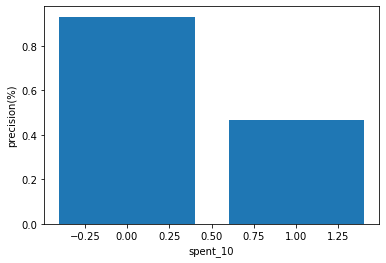

In [486]:
# 민감도 분석
y_pred_over_10 = np.where(model.predict(xgb.DMatrix(X_test_10)) > 0.3, 1, 0)

# 민감도, 재현성 비교를 위해 실제 값과 예측값을 하나의 df로 만듦
pred_over_10 = y_test_10.reset_index()
pred_over_10['over_10_pred'] = y_pred_over_10


aa10 = []
for i in range(0,2):
    cc10 = np.where((pred_over_10['over_10']==i) & (pred_over_10['over_10_pred']==i), 1, 0).sum() / pred_over_10[pred_over_10['over_10_pred']==i]['over_10'].count()
    aa10.append(cc10)

aanp10 = np.array(aa10)
x = np.arange(0,2)
plt.bar(x,aa10)
plt.xlabel('spent_10')
plt.ylabel('precision(%)')
print(model.__class__.__name__, accuracy_score(y_test_10, y_pred_over_10))
print(model.__class__.__name__, f1_score(y_test_10, y_pred_over_10))
print(aa10)
print('1차 분류될 총결제량 10 이하인 유저 비율 : ', pred_over_10[pred_over_10['over_10_pred']==0]['over_10_pred'].count() / pred_over_10[pred_over_10['over_10']==0]['over_10'].count())
print('실제 총결제량 10 이하인 유저 수 : ',pred_over_10[pred_over_10['over_10']==0]['over_10'].count())
print('1차 분류될 총결제량 10 이하인 유저 수 : ',pred_over_10[pred_over_10['over_10_pred']==0]['over_10_pred'].count())

In [483]:
10311-9853

458

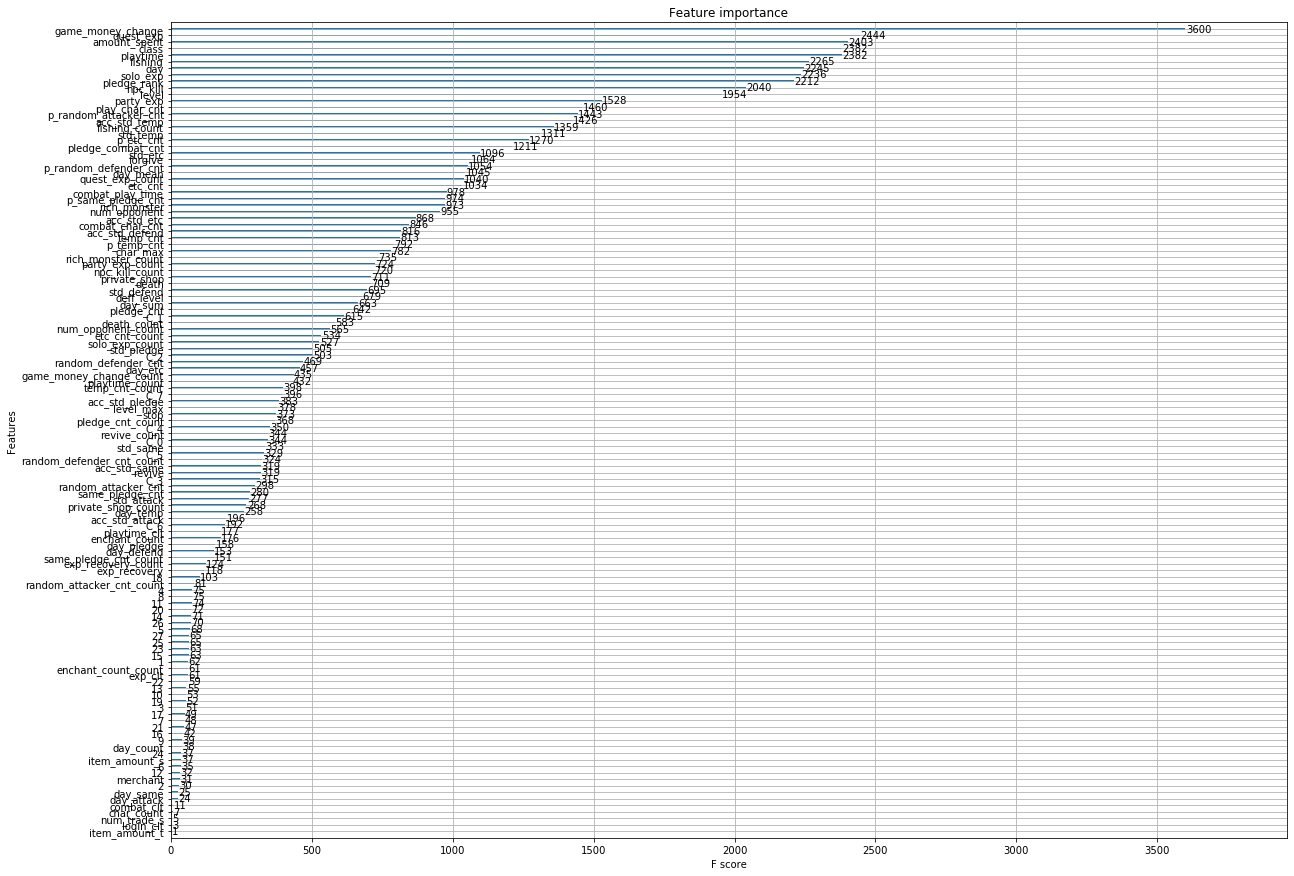

In [457]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_importance(model, ax=ax)
plt.show()

In [496]:
# 크로스체크
crosscheck_10 = pd.merge(pred_spent_0,pred_over_10, on ='index')
crosscheck_10 = pd.merge(crosscheck_10,t, on ='index')
crosscheck_10.head()

,index,spent_0,spent_0_pred,over_10,over_10_pred,over_20,pred
0,1186,0,0,0,0,0,0
1,8461,0,0,1,1,0,0
2,20986,0,0,0,0,0,0
3,23484,1,0,0,0,0,0
4,33783,1,1,0,0,0,0


In [475]:
# 무과금인데 10 이상이라고 나온 유저
# 무과금으로 확정
crosscheck_10[(crosscheck_10['spent_0_pred']==1) & (crosscheck_10['over_10_pred']==1)]

,index,spent_0,spent_0_pred,over_10,over_10_pred,over_20,pred
396,27559,1,1,0,1,0,0
913,24313,1,1,0,1,0,0
1119,19200,1,1,0,1,0,0
7284,27555,1,1,0,1,0,0
7684,24635,1,1,0,1,0,1
8301,24312,1,1,0,1,0,0
9759,29261,1,1,0,1,0,0
10064,18877,0,1,0,1,0,0
10454,33220,0,1,1,1,0,0


In [481]:
# 무과금인데 아니라고 나온 유저: 10 이하로 확정
print('무과금인데 아니라고 나온 유저 :',crosscheck_10[(crosscheck_10['spent_0']==1) & (crosscheck_10['spent_0_pred']==0)]['index'].count())

crosscheck_10[(crosscheck_10['spent_0']==1) & (crosscheck_10['spent_0_pred']==0) & (crosscheck_10['over_10_pred']==1)]
# 무과금 유저를 과금 유저하고 한 1674명 중에 98명만이 10이상이라고 나옴

무과금인데 아니라고 나온 유저 : 1674


,index,spent_0,spent_0_pred,over_10,over_10_pred,over_20,pred
93,13005,1,0,0,1,0,0
219,38970,1,0,0,1,0,0
429,26022,1,0,0,1,0,0
498,14874,1,0,0,1,0,0
597,272,1,0,0,1,0,1
647,36242,1,0,0,1,0,1
928,24133,1,0,0,1,0,0
1372,5626,1,0,0,1,0,1
1712,7201,1,0,0,1,0,0
1847,13957,1,0,0,1,0,0


In [601]:
# 무과금이라 예측했는데 10 이상이라고 나온 유저: 무과금
crosscheck_10[(crosscheck_10['spent_0_pred']==0) & (crosscheck_10['over_10_pred']==1)]

,index,spent_0,spent_0_pred,over_10,over_10_pred,over_20,pred
1,8461,0,0,1,1,0,0
7,11055,0,0,0,1,0,1
10,5023,0,0,1,1,0,0
13,22674,0,0,0,1,0,0
27,31926,0,0,0,1,0,0
30,7599,0,0,0,1,0,1
33,22145,0,0,1,1,0,0
44,29372,0,0,1,1,0,1
53,9242,0,0,1,1,0,0
78,26247,0,0,0,1,0,0


In [606]:
crosscheck_10[(crosscheck_10['spent_0_pred']==1) & (crosscheck_10['over_10_pred']==0)& (crosscheck_10['pred']==1)]

,index,spent_0,spent_0_pred,over_10,over_10_pred,over_20,pred
4735,35123,1,1,0,0,0,1
5741,10822,1,1,0,0,0,1
6019,30670,0,1,0,0,0,1
7870,35289,0,1,0,0,0,1
10325,17543,1,1,0,0,0,1
11399,24217,1,1,0,0,0,1


In [498]:
# 20미만 10 이상인 유저 군집
crosscheck_10[(crosscheck_10['over_10']==1) & (crosscheck_10['over_20']==0)]['index'].count() / crosscheck_10[(crosscheck_10['over_10_pred']==1) & (crosscheck_10['pred']==0)]['index'].count()

0.8216062544420754

--------

총결제량 20 이상 여부 분류하는 모델

민감도:  [0.9696672316888215, 0.24399494310998734]
1차 분류될 총결제량 20 미만 유저 비율 :  0.9775006540507544
실제 총결제량 20 미만 유저 수 :  11467
1차 제거될 총결제량 20 미만 유저 수 :  11209


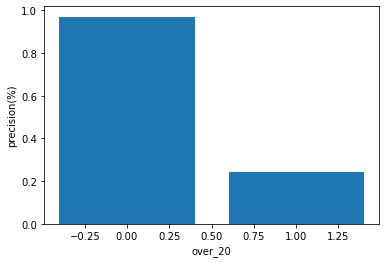

In [361]:
# 민감도 분석
a = []
for i in range(0,2):
    c = np.where((t['over_20']==i) & (t['pred']==i), 1, 0).sum() / t[t['pred']==i]['over_20'].count()
    a.append(c)

anp = np.array(a)
x = np.arange(0,2)
plt.bar(x,a)
plt.xlabel('over_20')
plt.ylabel('precision(%)')
print('민감도: ',a)
print('1차 분류될 총결제량 20 미만 유저 비율 : ', t[t['pred']==0]['pred'].count() / t[t['over_20']==0]['over_20'].count())
print('실제 총결제량 20 미만 유저 수 : ',t[t['over_20']==0]['over_20'].count())
print('1차 제거될 총결제량 20 미만 유저 수 : ',t[t['pred']==0]['pred'].count())
# 총결제량 20 미만인 유저의 2.5%(258명) 정도가 20 이상인 군집으로 잘못 분류되며
# 이는 총결제량 20 이상인 유저의 48% 정도임

In [362]:
# 그러면 그 다음 회귀는 어떻게 하지
# 일단 0이라고 된 애는 해결
# 20 미만이라고 나온 애들만 가지고 회귀?
# 20 이상이라고 나온 애들 가지고 회귀? 모든 예측 값에 +20?

In [340]:
crosscheck = pd.merge(pred_spent_0, t, on ='index')

In [343]:
crosscheck[(crosscheck['spent_0_pred']==1) & (crosscheck['pred']==1)]
# 무과금 모델은 무과금이라고 잘 예측했는데 총결제량 20 초과 여부 가르는 모델이 틀리는 경우가 다수 (5:2)

,index,spent_0,spent_0_pred,over_20,pred
4735,35123,1,1,0,1
5741,10822,1,1,0,1
6019,30670,0,1,0,1
7684,24635,1,1,0,1
7870,35289,0,1,0,1
10325,17543,1,1,0,1
11399,24217,1,1,0,1


In [461]:
crosscheck[(crosscheck['spent_0_pred']==1) & (crosscheck['pred']==1)]

,index,spent_0,spent_0_pred,over_20,pred
4735,35123,1,1,0,1
5741,10822,1,1,0,1
6019,30670,0,1,0,1
7684,24635,1,1,0,1
7870,35289,0,1,0,1
10325,17543,1,1,0,1
11399,24217,1,1,0,1


In [315]:
train_label.describe().T

,count,mean,std,min,25%,50%,75%,max
acc_id,40000.0,65281.105550,37525.623536,2.0,32792.75,65359.000000,97685.750000,130473.000000
survival_time,40000.0,45.706700,23.265907,1.0,24.00,64.000000,64.000000,64.000000
amount_spent,40000.0,0.124931,0.722272,0.0,0.00,0.020343,0.106119,39.412632
secession,40000.0,0.450100,0.497510,0.0,0.00,0.000000,1.000000,1.000000
total_spent,40000.0,3.924948,6.770322,0.0,0.00,0.974357,4.606581,97.515488
spent_0,40000.0,0.410950,0.492012,0.0,0.00,0.000000,1.000000,1.000000


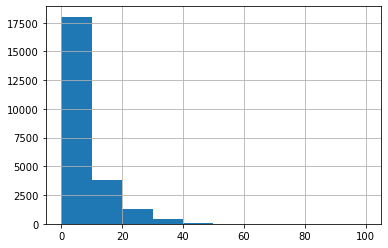

In [501]:
train_label['total_spent'].hist(range=(0.00000001,100))

-----------

# 종합 모델 만들기

결제량 계획

1. 비과금, 10 미만, 10 이상 20 미만, 20이상으로 분류 (각각 무과금,1,2,3 그룹이라 칭함) (train, valid, test 사용)
    - 전체 유저 대상으로 과금 여부, 10 이상 ,20 이상 여부 모델 각각 만듦  (fit)
    - 만들어진 모델로 유저(train,valid data) 분류 (predict)
    - 세 모델 크로스체크해서 상충되는 예측 결과 정리


2. 1그룹은 전반적으로 상관관계 높은 총결제량으로 예측
    - 1그룹으로 분류된 유저(train,valid data)를 대상으로 일평균결제량 예측 모델 생성 (fit)


3. 2그룹은 전반적으로 상관관계 높은 일평균결제량으로 예측
    - 2그룹으로 분류된 유저(train,valid data)를 대상으로 일평균결제량 예측 모델 생성 (fit)


4. 3그룹은 전반적으로 상관관계 높은 일평균결제량으로 예측
    - 3그룹으로 분류된 유저(train,valid data)를 대상으로 일평균결제량 예측 모델 생성 (fit)


5. test 데이터로 최종 테스트
    - test 데이터 그룹 분류 (predict)
    - test 데이터 각 그룹의 결제량 예측 (predict)

In [523]:
train_label = pd.read_csv('./train_label_add.csv')
train_label = train_label.sort_values('acc_id')

In [507]:
# 분류용 데이터셋 만들기 (무과금, 10미만, 20미만 이진분류 모델)
total_g = train_label[['acc_id','total_spent']]
total_g['spent_0'] = 0
total_g['under_10'] = 0
total_g['under_20'] = 0
total_g['spent_0'] = np.where(total_g['spent_0']==0, 1, 0)
total_g['under_10'] = np.where(total_g['under_10']<10, 1, 0)
total_g['under_20'] = np.where(total_g['under_20']<20, 1, 0)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [525]:
data = pd.merge(feature_128, train_label, on = 'acc_id')
X_train_final, X_test_final, y_train_all, y_test_all = train_test_split(data, data['total_spent'], test_size=0.1, random_state=42)

In [547]:
# 모델 생성용 데이터
train_data = X_train_final.drop(['survival_time', 'amount_spent_y', 'secession',
       'total_spent'], axis=1)
label = X_train_final[['acc_id','total_spent','amount_spent_y']]

# 분류용 데이터셋 만들기 (무과금, 10미만, 20미만 이진분류 모델)
total_g = label[['acc_id','total_spent']]
total_g['spent_0'] = 0
total_g['under_10'] = 0
total_g['under_20'] = 0
# 무과금이면 1
total_g['spent_0'] = np.where(total_g['total_spent']==0, 1, 0)
# 10 미만이면 1
total_g['under_10'] = np.where(total_g['total_spent']<10, 1, 0)
# 20 미만이면 1
total_g['under_20'] = np.where(total_g['total_spent']<20, 1, 0)

# 최종 테스트용 데이터
test_train = X_test_final.drop(['survival_time', 'amount_spent_y', 'secession',
       'total_spent'], axis=1)
test_label = X_test_final[['acc_id','total_spent','amount_spent_y']]

## 1-1-1) 총결제량 0인 유저 분류

In [ ]:
# 이진분류 공통 파라미터
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'auc',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 500,
    'n_estimators': 200,
    'max_leaves': 300
}

In [509]:
# describe에서 4분위 비교해서 0이 더 많은 컬럼들 가져옴
spent_0_cols=['private_shop', 'party_exp','pledge_cnt','random_defender_cnt','etc_cnt','num_opponent','npc_kill','solo_exp'
,'quest_exp','rich_monster','death','revive','fishing','forgive','temp_cnt_count','etc_cnt_count','num_opponent_count','npc_kill_count','solo_exp_count','party_exp_count','quest_exp_count','rich_monster_count','death_count','revive_count','fishing_count','private_shop_count','playtime_clt','day_temp','day_etc','std_defend','std_temp','std_etc','acc_std_temp','acc_std_etc','C_0','C_5','day','play_char_cnt','combat_char_cnt','pledge_combat_cnt','p_random_attacker_cnt','p_random_defender_cnt','p_same_pledge_cnt','p_temp_cnt','p_etc_cnt','combat_play_time','pledge_rank']

In [534]:
# 미리 선별한 컬럼만 사용
spent_0_df = train_data[spent_0_cols]

# 선별한 컬럼의 값의 유무를 기재 
for col in spent_0_cols:
    spent_0_df[str(col) + '_count'] = np.where(spent_0_df[col]==0, 0, 1)
    
# 기존의 컬럼 제거    
spent_0_df = spent_0_df.drop(spent_0_cols, axis=1)

# acc_id 합치기
spent_0_df_acc = pd.concat([feature_128[['acc_id']],spent_0_df], axis=1)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [548]:
# valid는 사실상 첫번째 test data
# X_test는 최종 테스트용
from sklearn.model_selection import train_test_split

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(spent_0_df, total_g['spent_0'], test_size=0.3, random_state=42)
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_train_0, y_train_0, test_size=0.25, random_state=42)

X_train_0.shape,  X_test_0.shape, X_valid_0.shape, y_train_0.shape, y_test_0.shape, y_valid_0.shape

((18900, 36), (10800, 36), (6300, 36), (18900,), (10800,), (6300,))

In [590]:
# 모델 학습
VALID = True
if VALID == True:

    tr_data_0 = xgb.DMatrix(X_train_0, y_train_0)
    va_data_0 = xgb.DMatrix(X_valid_0, y_valid_0)

    

    watchlist = [(tr_data_0, 'train'), (va_data_0, 'valid')]

    model_0 = xgb.train(params, tr_data_0, 500,  watchlist,maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.90148	valid-auc:0.864715
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.92865	valid-auc:0.883348
Stopping. Best iteration:
[45]	train-auc:0.92762	valid-auc:0.883552



Booster 0.8211111111111111
Booster 0.7555668016194331
[0.8023462010639749, 0.8607667915825886]
1차 제거될 무과금 유저 비율 :  0.7821871476888388
실제 비과금 유저 수 :  4435
1차 제거될 비과금 유저 수 :  3469
임계값 :  0.6


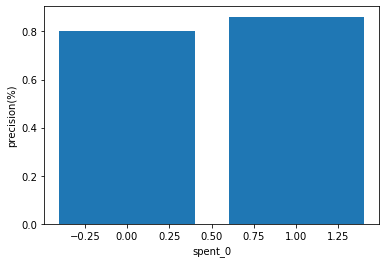

In [561]:
# 민감도 분석
y_pred_spent_0 = np.where(model_0.predict(xgb.DMatrix(X_test_0)) > 0.6, 1, 0)


# 민감도, 재현성 비교를 위해 실제 값과 예측값을 하나의 df로 만듦
pred_spent_0 = y_test_0.reset_index()
pred_spent_0['spent_0_pred'] = y_pred_spent_0


aa = []
for i in range(0,2):
    cc = np.where((pred_spent_0['spent_0']==i) & (pred_spent_0['spent_0_pred']==i), 1, 0).sum() / pred_spent_0[pred_spent_0['spent_0_pred']==i]['spent_0'].count()
    aa.append(cc)

aanp = np.array(aa)
x = np.arange(0,2)
plt.bar(x,aa)
plt.xlabel('spent_0')
plt.ylabel('precision(%)')
print(model.__class__.__name__, accuracy_score(y_test_0, y_pred_spent_0))
print(model.__class__.__name__, f1_score(y_test_0, y_pred_spent_0))
print(aa)
print('1차 제거될 무과금 유저 비율 : ', pred_spent_0[pred_spent_0['spent_0_pred']==1]['spent_0_pred'].count() / pred_spent_0[pred_spent_0['spent_0']==1]['spent_0'].count())
print('실제 비과금 유저 수 : ',pred_spent_0[pred_spent_0['spent_0']==1]['spent_0'].count())
print('1차 제거될 비과금 유저 수 : ',pred_spent_0[pred_spent_0['spent_0_pred']==1]['spent_0_pred'].count())
print('임계값 : ', 0.6)

## 1-1-2) 총결제량 10 미만인 유저 분류

In [564]:
from sklearn.model_selection import train_test_split

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(train_data[train_data.columns[1:]], total_g['under_10'], test_size=0.3, random_state=42)
X_train_10, X_valid_10, y_train_10, y_valid_10 = train_test_split(X_train_10, y_train_10, test_size=0.25, random_state=42)

X_train_10.shape, X_test_10.shape,  X_valid_10.shape, y_train_10.shape, y_test_10.shape,  y_valid_10.shape

((18900, 128), (10800, 128), (6300, 128), (18900,), (10800,), (6300,))

In [567]:
# 모델 학습
VALID = True
if VALID == True:

    tr_data_10 = xgb.DMatrix(X_train_10, y_train_10)
    va_data_10 = xgb.DMatrix(X_valid_10, y_valid_10)

    

    watchlist = [(tr_data_10, 'train'), (va_data_10, 'valid')]

    model_10 = xgb.train(params, tr_data_10, 500,  watchlist,maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.951776	valid-auc:0.794459
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.998541	valid-auc:0.855398
[100]	train-auc:0.999222	valid-auc:0.858589
[150]	train-auc:0.999287	valid-auc:0.86011
[200]	train-auc:0.999291	valid-auc:0.860776
[250]	train-auc:0.999296	valid-auc:0.861091
[300]	train-auc:0.999296	valid-auc:0.861111
Stopping. Best iteration:
[286]	train-auc:0.999298	valid-auc:0.861134



Booster 0.8502777777777778
Booster 0.9118560915780868
[0.46114864864864863, 0.9268617021276596]
1차 분류될 총결제량 10 이하인 유저 비율 :  0.9681364660444158
실제 총결제량 10 이하인 유저 수 :  9321
1차 분류될 총결제량 10 이하인 유저 수 :  9024
임계값 :  0.7


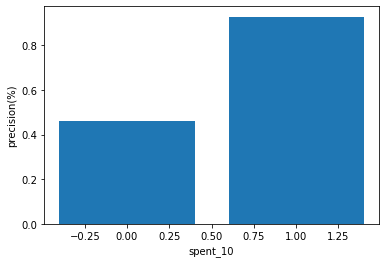

In [576]:
# 민감도 분석
y_pred_under_10 = np.where(model_10.predict(xgb.DMatrix(X_test_10)) > 0.7, 1, 0)

# 민감도, 재현성 비교를 위해 실제 값과 예측값을 하나의 df로 만듦
pred_under_10 = y_test_10.reset_index()
pred_under_10['under_10_pred'] = y_pred_under_10


aa10 = []
for i in range(0,2):
    cc10 = np.where((pred_under_10['under_10']==i) & (pred_under_10['under_10_pred']==i), 1, 0).sum() / pred_under_10[pred_under_10['under_10_pred']==i]['under_10'].count()
    aa10.append(cc10)

aanp10 = np.array(aa10)
x = np.arange(0,2)
plt.bar(x,aa10)
plt.xlabel('spent_10')
plt.ylabel('precision(%)')
print(model.__class__.__name__, accuracy_score(y_test_10, y_pred_under_10))
print(model.__class__.__name__, f1_score(y_test_10, y_pred_under_10))
print(aa10)
print('1차 분류될 총결제량 10 이하인 유저 비율 : ', pred_under_10[pred_under_10['under_10_pred']==1]['under_10_pred'].count() / pred_under_10[pred_under_10['under_10']==1]['under_10'].count())
print('실제 총결제량 10 이하인 유저 수 : ',pred_under_10[pred_under_10['under_10']==1]['under_10'].count())
print('1차 분류될 총결제량 10 이하인 유저 수 : ',pred_under_10[pred_under_10['under_10_pred']==1]['under_10_pred'].count())
print('임계값 : ', 0.7)

## 1-1-3) 총결제량 20 미만인 유저 분류

In [577]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(train_data[train_data.columns[1:]], total_g['under_20'], test_size=0.3, random_state=42)
X_train_20, X_valid_20, y_train_20, y_valid_20 = train_test_split(X_train_20, y_train_20, test_size=0.25, random_state=42)

X_train_20.shape, X_test_20.shape,  X_valid_20.shape, y_train_20.shape, y_test_20.shape,  y_valid_20.shape

((18900, 128), (10800, 128), (6300, 128), (18900,), (10800,), (6300,))

In [578]:
# 모델 학습
VALID = True
if VALID == True:

    tr_data_20 = xgb.DMatrix(X_train_20, y_train_20)
    va_data_20 = xgb.DMatrix(X_valid_20, y_valid_20)

    

    watchlist = [(tr_data_20, 'train'), (va_data_20, 'valid')]

    model_20 = xgb.train(params, tr_data_20, 500,  watchlist,maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.906365	valid-auc:0.793588
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.998618	valid-auc:0.837213
Stopping. Best iteration:
[20]	train-auc:0.992787	valid-auc:0.838442



Booster 0.9285185185185185
Booster 0.9624404008952029
[0.23141891891891891, 0.9689459247648903]
1차 분류될 총결제량 20 이하인 유저 비율 :  0.9866615116953412
실제 총결제량 20 이하인 유저 수 :  10346
1차 분류될 총결제량 20 이하인 유저 수 :  10208
임계값 :  0.68


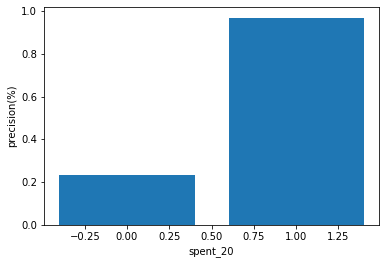

In [585]:
# 민감도 분석
y_pred_under_20 = np.where(model_20.predict(xgb.DMatrix(X_test_20)) > 0.68, 1, 0)

# 민감도, 재현성 비교를 위해 실제 값과 예측값을 하나의 df로 만듦
pred_under_20 = y_test_20.reset_index()
pred_under_20['under_20_pred'] = y_pred_under_20


aa20 = []
for i in range(0,2):
    cc20 = np.where((pred_under_20['under_20']==i) & (pred_under_20['under_20_pred']==i), 1, 0).sum() / pred_under_20[pred_under_20['under_20_pred']==i]['under_20'].count()
    aa20.append(cc20)

aanp20 = np.array(aa20)
x = np.arange(0,2)
plt.bar(x,aa20)
plt.xlabel('spent_20')
plt.ylabel('precision(%)')
print(model.__class__.__name__, accuracy_score(y_test_20, y_pred_under_20))
print(model.__class__.__name__, f1_score(y_test_20, y_pred_under_20))
print(aa20)
print('1차 분류될 총결제량 20 이하인 유저 비율 : ', pred_under_20[pred_under_20['under_20_pred']==1]['under_20_pred'].count() / pred_under_20[pred_under_20['under_20']==1]['under_20'].count())
print('실제 총결제량 20 이하인 유저 수 : ',pred_under_20[pred_under_20['under_20']==1]['under_20'].count())
print('1차 분류될 총결제량 20 이하인 유저 수 : ',pred_under_20[pred_under_20['under_20_pred']==1]['under_20_pred'].count())
print('임계값 : ', 0.68)

## 1-2,3) train_data를 각 그룹으로 분류

In [1017]:
all_pred_under_0 = np.where(model_0.predict(xgb.DMatrix(spent_0_df)) > 0.6, 1, 0)
all_pred_under_10 = np.where(model_10.predict(xgb.DMatrix(train_data[train_data.columns[1:]])) > 0.7, 1, 0)
all_pred_under_20 = np.where(model_20.predict(xgb.DMatrix(train_data[train_data.columns[1:]])) > 0.68, 1, 0)

In [1018]:
# 분류를 위한 크로스체크
crosscheck = train_data[['acc_id']]

crosscheck['pred_spent_0'] = 0
crosscheck['pred_under_10'] = 0
crosscheck['pred_under_20'] = 0

crosscheck['pred_spent_0'] = all_pred_under_0
crosscheck['pred_under_10'] = all_pred_under_10
crosscheck['pred_under_20'] = all_pred_under_20



C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [1019]:
## 정상적의 경우
# 1,1,1 : 무과금 그룹 1
# 0,1,1 : 0 초과 10 미만 그룹 2
# 0,1,1 : 10 이상 20 미만 그룹 3
# 0,0,0 : 20 이상 그룹 4
crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_2'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_3'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_4'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==0),1,0)

## 3개의 예측 결과가 상충하는 경우(모든 판단은 위에서 한 crosscheck 시뮬레이션을 바탕으로 함: crosscheck_10 찾으세요)
# 1,0,1 : 무과금, 10 미만, 20 이상으로 예측한 경우(x<10, x>=20) --> 무과금으로 판단할 것임
# 1,1,0 : 무과금, 10 이상, 20 미만으로 예측한 경우(x=0, x>=10) --> 무과금으로 판단할 것임
# 1,0,0 : 무과금, 10 이상, 20 이상으로 예측한 경우(x=0, x>=20) --> 무과금으로 판단할 것임
# 0,1,0 : 과금, 10 미만, 20 이상으로 예측한 경우(x<10,x>20) --> 0초과 10 미만인 그룹으로 판단할 것임

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==1),1, crosscheck['group_1'])

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==0),1, crosscheck['group_1'])

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==0),1, crosscheck['group_1'])

crosscheck['group_2'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==0),1, crosscheck['group_2'])


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [1020]:
# 그룹별로 나눔
group_1 = crosscheck[crosscheck['group_1']==1][['acc_id']]
group_2 = crosscheck[crosscheck['group_2']==1][['acc_id']]
group_3 = crosscheck[crosscheck['group_3']==1][['acc_id']]
group_4 = crosscheck[crosscheck['group_4']==1][['acc_id']]

In [1021]:
train_data.shape

(36000, 129)

In [1022]:
group_2_data = pd.merge(group_2, train_data, on = 'acc_id', how='inner')
group_3_data = pd.merge(group_3, train_data, on = 'acc_id', how='inner')
group_4_data = pd.merge(group_4, train_data, on = 'acc_id', how='inner')

## 2-1) 2번 그룹 총결제량 예측 모델

In [1023]:
group_2_label = pd.merge(group_2[['acc_id']], total_g[['acc_id','total_spent']], on = 'acc_id', how='inner')

(array([129.,  94.,  90.,  63.,  70.,  76.,  59.,  41.,  42.,  32.,  26.,
         23.,  26.,  21.,  25.,  17.,  15.,   8.,  10.,  14.,  11.,   9.,
         16.,   8.,   3.,   6.,   2.,   1.,   2.,   5.,   0.,   1.,   2.,
          1.,   0.,   0.,   1.,   0.,   2.]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49]),
 <a list of 39 Patch objects>)

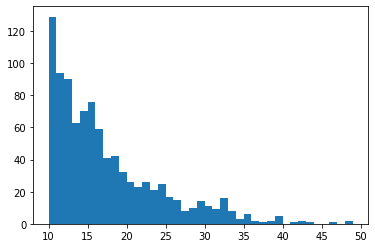

In [1024]:
plt.hist(group_2_label['total_spent'], range(10,50))

In [999]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(group_2_data[group_2_data.columns[1:]],  group_2_label['total_spent'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13176, 128), (5647, 128), (13176,), (5647,))

[03:08:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
X_train.shape : (13176, 128)
X_train_s1.shape : (13176, 78)
[False False False False False False  True False False False  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True False  True  True  True  True False False  True False False  True
  True False False False  True  True  True False  True  True False  True
  True  True False False False False False False False False  True False
 False  True  True False  True False  True False  True False  True  True
 False  True  True  True  True  True False  True  True  True  True  True
 False False  True  True  True  True False  True  True  True  True  True
  True False  True  True False False False False False  True  True False
 False  True  True  True  True  True  True  Tr

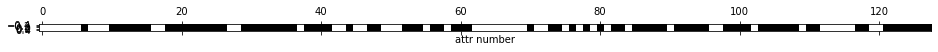

In [943]:
from sklearn.feature_selection import SelectFromModel
select_g2 = SelectFromModel(xgb.XGBRegressor(max_depth=30, n_estimators=200), threshold="0.7*mean")
select_g2.fit(X_train,y_train)

X_train_s1 = select_g2.transform(X_train)
X_test_s1 = select_g2.transform(X_test)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_s1.shape : {}".format(X_train_s1.shape))
mask_g2 = select_g2.get_support()
print(mask_g2)
plt.matshow(mask_g2.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [ ]:
# 모델 학습
xgb_g2=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g2.fit(X_train_s1,y_train)
y_pred_g2 = xgb_g2.predict(X_test_s1)

4.672481741684217

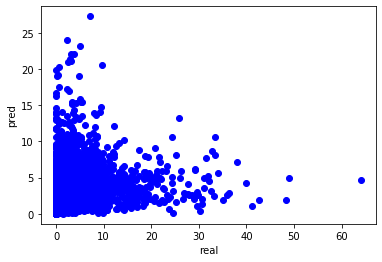

In [726]:
g2_real = y_test.reset_index()
g2_real['total_spent_pred'] = y_pred_g2

plt.plot(g2_real['total_spent'],g2_real['total_spent_pred'],'bo')
plt.xlabel('real')
plt.ylabel('pred')

from sklearn.metrics import mean_squared_error as mse
linreg_RMSEk_g2 = np.sqrt(mse(g2_real['total_spent_pred'], g2_real['total_spent']))
linreg_RMSEk_g2
# 4.8707689056100305 --> 1.5 mean (feature = 15)
# 4.7325415334831265 --> mean, (feature = 42)
## 4.672481741684217 --> 0.7 mean, (feature = 78)
# 4.705162118063246 --> 0.6 mean, (feature = 85)
# 4.685654317081156 --> 0.5 mean, (feature = 98)
#  --> all 

4.4741688028418345

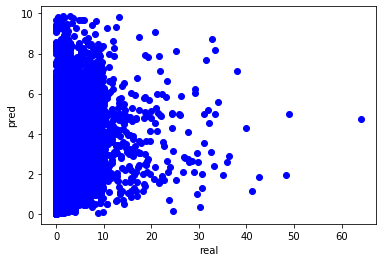

In [755]:
# 총결제량 10 이상이면 중간값은 5로, 음수 값은 0으로 바꿈
g2_real['total_spent_pred'] = np.where(g2_real['total_spent_pred']>=10, 5, g2_real['total_spent_pred'])
g2_real['total_spent_pred'] = np.where(g2_real['total_spent_pred']<0, 0, g2_real['total_spent_pred'])
plt.plot(g2_real['total_spent'],g2_real['total_spent_pred'],'bo')
plt.xlabel('real')
plt.ylabel('pred')

linreg_RMSEk_g2 = np.sqrt(mse(g2_real['total_spent_pred'], g2_real['total_spent']))
linreg_RMSEk_g2
#4.4741688028418345

In [1000]:
columns_g2 = []
for i in range(len(mask_g2)):
    if mask_g2[i] == True:
        columns_g2.append(i+1)
cols_g2 = data.columns[[columns_g2]]
cols_g2 = list(cols_g2)

g2_select = group_2_data[cols_g2]

In [1001]:
g2_select.columns

Index(['random_attacker_cnt', 'num_opponent', 'playtime', 'npc_kill',
       'solo_exp', 'quest_exp', 'rich_monster', 'exp_recovery', 'fishing',
       'game_money_change', 'enchant_count', 'forgive', 'pledge_cnt_count',
       'random_attacker_cnt_count', 'random_defender_cnt_count',
       'temp_cnt_count', 'num_opponent_count', 'playtime_count',
       'npc_kill_count', 'solo_exp_count', 'party_exp_count',
       'quest_exp_count', 'rich_monster_count', 'death_count',
       'exp_recovery_count', 'fishing_count', 'private_shop_count',
       'game_money_change_count', '1', '4', '5', '9', '10', '11', '13', '14',
       '16', '17', '18', '27', 'combat_clt', 'playtime_clt', 'day_pledge',
       'day_defend', 'day_same', 'std_pledge', 'std_attack', 'std_temp',
       'std_same', 'std_etc', 'acc_std_pledge', 'acc_std_attack',
       'acc_std_temp', 'acc_std_same', 'acc_std_etc', 'deff_level',
       'level_max', 'char_max', 'day_sum', 'C_0', 'C_1', 'C_3', 'C_4', 'C_5',
       'C_6', 'C_7

In [1025]:
# 모델 학습
columns_g2 = []
for i in range(len(mask_g2)):
    if mask_g2[i] == True:
        columns_g2.append(i+1)
cols_g2 = data.columns[[columns_g2]]
cols_g2 = list(cols_g2)

g2_select = group_2_data[cols_g2]

X_train, X_test, y_train, y_test = train_test_split(g2_select,  group_2_label['total_spent'], test_size=0.3, random_state=42)

xgb_g2=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g2.fit(X_train,y_train)

[03:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=30, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 3. 3번 그룹 일평균결제량으로 예측

In [880]:
total_g.columns

Index(['acc_id', 'total_spent', 'spent_0', 'under_10', 'under_20'], dtype='object')

In [881]:
group_3_label = pd.merge(group_3[['acc_id']], label[['acc_id','amount_spent_y','total_spent']], on = 'acc_id', how='inner')

(array([ 663.,  444., 1173.,  971.,  322.,   81.,   48.,   32.,   11.,
           5.]),
 array([ 0.        ,  4.63289387,  9.26578775, 13.89868162, 18.5315755 ,
        23.16446937, 27.79736325, 32.43025712, 37.063151  , 41.69604487,
        46.32893875]),
 <a list of 10 Patch objects>)

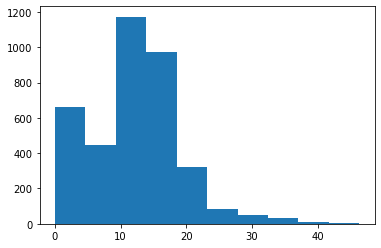

In [882]:
plt.hist(group_3_label['total_spent'])

In [883]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(group_3_data[group_3_data.columns[1:]],  group_3_label['amount_spent_y'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2625, 128), (1125, 128), (2625,), (1125,))

[03:29:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
X_train.shape : (2625, 77)
X_train_s1.shape : (2625, 29)
[False False False False False False False  True  True False False False
 False False  True False False False False False  True  True  True False
  True False False  True False False False False False False  True False
 False False  True False False False False  True  True  True False False
 False  True  True  True False False  True  True  True False False False
 False False False False  True  True  True  True False  True  True False
 False  True  True  True  True]


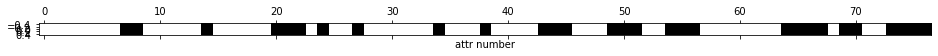

In [975]:
from sklearn.feature_selection import SelectFromModel
select_g3 = SelectFromModel(xgb.XGBRegressor(max_depth=30, n_estimators=200), threshold="mean")
select_g3.fit(X_train,y_train)

X_train_s1 = select_g3.transform(X_train)
X_test_s1 = select_g3.transform(X_test)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_s1.shape : {}".format(X_train_s1.shape))
mask_g3 = select_g3.get_support()
print(mask_g3)
plt.matshow(mask_g3.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [772]:
# 모델 학습
xgb_g3=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g3.fit(X_train_s1,y_train)
y_pred_g3 = xgb_g3.predict(X_test_s1)

[01:57:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1.4572649396893824

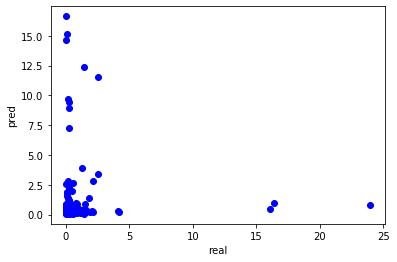

In [773]:
g3_real = y_test.reset_index()
g3_real['amount_spent_pred'] = y_pred_g3
g3_real['amount_spent_pred'] = np.where(g3_real['amount_spent_pred']<0, 0, g3_real['amount_spent_pred'])

plt.plot(g3_real['amount_spent_y'],g3_real['amount_spent_pred'],'bo')
plt.xlabel('real')
plt.ylabel('pred')

from sklearn.metrics import mean_squared_error as mse
linreg_RMSEk_g3 = np.sqrt(mse(g3_real['amount_spent_pred'], g3_real['amount_spent_y']))
linreg_RMSEk_g3

# 1.4572649396893824 --> mean 1.몇 (feature = 10)
# 1.4180457383323843 --> mean (feature = 11)
# 1.662409496963163 --> mean 0.7 (feature = 15)
# 1.6789783979681743 --> mean 0.5 (feature = 17)
# 1.65217939567305 --> mean 0.3 (feature = 20)
# 1.6440569358618562 --> mean 0.1 (feature = 35)
# 1.64962723655327 --> mean 0.08 (feature = 38)

In [1004]:
# 모델 학습
columns_g3 = []
for i in range(len(mask_g3)):
    if mask_g3[i] == True:
        columns_g3.append(i+1)
cols_g3 = data.columns[[columns_g3]]
cols_g3 = list(cols_g3)

g3_select = group_3_data[cols_g3]

X_train, X_test, y_train, y_test = train_test_split(g3_select,  group_3_label['total_spent'], test_size=0.3, random_state=42)

xgb_g3=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g3.fit(X_train,y_train)

[03:35:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=30, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 4. 4번 그룹 일평균결제량으로 예측

In [885]:
group_4_label = pd.merge(group_4[['acc_id']], label[['acc_id','amount_spent_y','total_spent']], on = 'acc_id', how='inner')

(array([352., 328., 718., 265.,  38.,   4.,   1.,   0.,   0.,   1.]),
 array([ 0.        ,  9.75154877, 19.50309754, 29.2546463 , 39.00619507,
        48.75774384, 58.50929261, 68.26084138, 78.01239014, 87.76393891,
        97.51548768]),
 <a list of 10 Patch objects>)

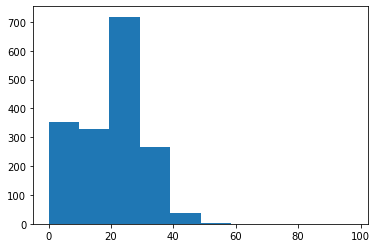

In [886]:
plt.hist(group_4_label['total_spent'])

In [887]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(group_4_data[group_4_data.columns[1:]],  group_4_label['amount_spent_y'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1194, 128), (513, 128), (1194,), (513,))

In [ ]:
from sklearn.feature_selection import SelectFromModel
select_g4 = SelectFromModel(xgb.XGBRegressor(max_depth=30, n_estimators=200), threshold="0.9*mean")
select_g4.fit(X_train,y_train)

X_train_s1 = select_g4.transform(X_train)
X_test_s1 = select_g4.transform(X_test)

print("X_train.shape : {}".format(X_train.shape))
print("X_train_s1.shape : {}".format(X_train_s1.shape))
mask_g4 = select_g4.get_support()
print(mask_g4)
plt.matshow(mask_g4.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [820]:
# 모델 학습
xgb_g4=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g4.fit(X_train_s1,y_train)
y_pred_g4 = xgb_g4.predict(X_test_s1)

[02:20:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1.2028377436965634

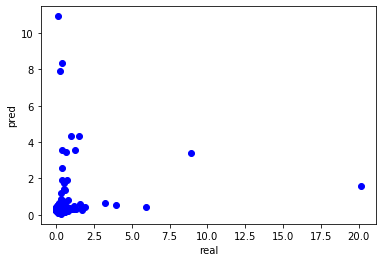

In [821]:
g4_real = y_test.reset_index()
g4_real['amount_spent_pred'] = y_pred_g4
g4_real['amount_spent_pred'] = np.where(g4_real['amount_spent_pred']<0, 0, g4_real['amount_spent_pred'])

plt.plot(g4_real['amount_spent_y'],g4_real['amount_spent_pred'],'bo')
plt.xlabel('real')
plt.ylabel('pred')

from sklearn.metrics import mean_squared_error as mse
linreg_RMSEk_g4 = np.sqrt(mse(g4_real['amount_spent_pred'], g4_real['amount_spent_y']))
linreg_RMSEk_g4

# 1.2062753306239076 --> mean 1.2 (feature = 8)
# 1.2062753306239076 --> mean (feature = 8)
##1.2028377436965634 --> mean 0.9 (feature = 9)
# 1.207852291854915 --> mean 0.75 (feature = 10)
# 1.208650639535378 --> mean 0.11 (feature = 11)
# 1.2194610511554107 --> mean 0.1 (feature = 22)
# 1.2168023152574272 --> mean 0.08 (feature = 29)
# 1.2117882971419436 --> eman 0.05 (feature = 40)
# 1.2128912210144822 --> all 

In [1005]:
# 모델 학습
columns_g4 = []
for i in range(len(mask_g4)):
    if mask_g4[i] == True:
        columns_g4.append(i+1)
cols_g4 = data.columns[[columns_g4]]
cols_g4 = list(cols_g4)

g4_select = group_4_data[cols_g4]

X_train, X_test, y_train, y_test = train_test_split(g4_select,  group_4_label['total_spent'], test_size=0.3, random_state=42)

xgb_g4=xgb.XGBRegressor(max_depth=30, n_estimators=200)
xgb_g4.fit(X_train,y_train)

[03:35:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=30, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 5. 최종 테스트 

In [1026]:
test_train.shape

(4000, 129)

In [1027]:
spent_0_df_test = test_train[spent_0_cols]

# 선별한 컬럼의 값의 유무를 기재 
for col in spent_0_cols:
    spent_0_df_test[str(col) + '_count'] = np.where(spent_0_df_test[col]==0, 0, 1)
    
# 기존의 컬럼 제거    
spent_0_df_test = spent_0_df_test.drop(spent_0_cols, axis=1)

# acc_id 합치기
spent_0_df_acc_test = pd.concat([test_train[['acc_id']],spent_0_df_test], axis=1)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1028]:
all_pred_under_0 = np.where(model_0.predict(xgb.DMatrix(spent_0_df_test)) > 0.6, 1, 0)
all_pred_under_10 = np.where(model_10.predict(xgb.DMatrix(test_train[test_train.columns[1:]])) > 0.7, 1, 0)
all_pred_under_20 = np.where(model_20.predict(xgb.DMatrix(test_train[test_train.columns[1:]])) > 0.72, 1, 0)

In [1029]:
crosscheck.head()

,acc_id,pred_spent_0,pred_under_10,pred_under_20,group_1,group_2,group_3,group_4
20038,65474,1,1,1,1,0,0,0
23937,77991,0,1,1,0,1,0,0
6046,19905,0,1,1,0,1,0,0
23187,75526,0,1,1,0,1,0,0
25421,82816,0,1,1,0,1,0,0


In [1030]:
# 분류를 위한 크로스체크
crosscheck = test_train[['acc_id']]

crosscheck['pred_spent_0'] = 0
crosscheck['pred_under_10'] = 0
crosscheck['pred_under_20'] = 0

crosscheck['pred_spent_0'] = all_pred_under_0
crosscheck['pred_under_10'] = all_pred_under_10
crosscheck['pred_under_20'] = all_pred_under_20

## 정상적의 경우
# 1,1,1 : 무과금 그룹 1
# 0,1,1 : 0 초과 10 미만 그룹 2
# 0,1,1 : 10 이상 20 미만 그룹 3
# 0,0,0 : 20 이상 그룹 4
crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_2'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_3'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==1),1,0)

crosscheck['group_4'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==0),1,0)

## 3개의 예측 결과가 상충하는 경우(모든 판단은 위에서 한 crosscheck 시뮬레이션을 바탕으로 함: crosscheck_10 찾으세요)
# 1,0,1 : 무과금, 10 미만, 20 이상으로 예측한 경우(x<10, x>=20) --> 무과금으로 판단할 것임
# 1,1,0 : 무과금, 10 이상, 20 미만으로 예측한 경우(x=0, x>=10) --> 무과금으로 판단할 것임
# 1,0,0 : 무과금, 10 이상, 20 이상으로 예측한 경우(x=0, x>=20) --> 무과금으로 판단할 것임
# 0,1,0 : 과금, 10 미만, 20 이상으로 예측한 경우(x<10,x>20) --> 0초과 10 미만인 그룹으로 판단할 것임

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==1),1, crosscheck['group_1'])

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==0),1, crosscheck['group_1'])

crosscheck['group_1'] = np.where((crosscheck['pred_spent_0']==1) & (crosscheck['pred_under_10']==0) & (crosscheck['pred_under_20']==0),1, crosscheck['group_1'])

crosscheck['group_2'] = np.where((crosscheck['pred_spent_0']==0) & (crosscheck['pred_under_10']==1) & (crosscheck['pred_under_20']==0),1, crosscheck['group_2'])

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [1031]:
# 그룹별로 나눔
group_1 = crosscheck[crosscheck['group_1']==1][['acc_id']]
group_2 = crosscheck[crosscheck['group_2']==1][['acc_id']]
group_3 = crosscheck[crosscheck['group_3']==1][['acc_id']]
group_4 = crosscheck[crosscheck['group_4']==1][['acc_id']]

group_2_data = pd.merge(group_2, test_train, on = 'acc_id', how='inner')
group_3_data = pd.merge(group_3, test_train, on = 'acc_id', how='inner')
group_4_data = pd.merge(group_4, test_train, on = 'acc_id', how='inner')

In [1032]:
group_3_data.head()

,acc_id,class,temp_cnt,private_shop,level,party_exp,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,p_etc_cnt,combat_play_time,pledge_rank
0,128409,195,2.398639,0.0,862,2.643727,0.513474,0.000000,0.000000,0.000000,...,180.951847,92.280390,59.267700,57.161061,42.060427,58.087356,103.135019,197.858750,254.974809,242668
1,49854,13,0.000000,0.0,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,74846,28,2.878367,0.0,476,0.192016,14.248902,0.000000,5.915322,12.398273,...,25.442970,15.987568,9.015276,7.810828,11.230420,38.990143,17.205650,10.291798,27.661378,17654
3,73873,84,1.918911,0.0,476,0.001583,0.000000,3.131975,3.549193,0.000000,...,2.129270,0.613518,0.000000,0.355038,0.286125,0.000000,0.791064,0.276052,1.986155,144116
4,102860,180,23.506660,0.0,1795,0.133361,46.533576,0.000000,14.196774,0.000000,...,29.629331,11.801207,5.997435,1.291046,4.291880,0.795717,23.731931,12.372808,33.785945,21824


In [1033]:
type(mask_g2)

numpy.ndarray

In [1034]:
# 추출된 특징으로 데이터 변경

columns_g2 = []
for i in range(len(mask_g2)):
    if mask_g2[i] == True:
        columns_g2.append(i+1)
cols_g2 = test_train.columns[[columns_g2]]
cols_g2 = list(cols_g2)

g2_select = group_2_data[cols_g2]


columns_g3 = []
for i in range(len(list(mask_g3))):
    if mask_g3[i] == True:
        columns_g3.append(i+1)
cols_g3 = test_train.columns[[columns_g3]]
cols_g3 = list(cols_g3)

g3_select = group_3_data[cols_g3]

columns_g4 = []
for i in range(len(list(mask_g4))):
    if mask_g4[i] == True:
        columns_g4.append(i+1)
cols_g4 = test_train.columns[[columns_g4]]
cols_g4 = list(cols_g4)

g4_select = group_4_data[cols_g4]

In [1039]:
group_4_data.columns

Index(['acc_id', 'class', 'temp_cnt', 'private_shop', 'level', 'party_exp',
       'pledge_cnt', 'random_attacker_cnt', 'random_defender_cnt',
       'same_pledge_cnt',
       ...
       'play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'p_random_attacker_cnt', 'p_random_defender_cnt', 'p_same_pledge_cnt',
       'p_temp_cnt', 'p_etc_cnt', 'combat_play_time', 'pledge_rank'],
      dtype='object', length=129)

In [1036]:
# 예측
y_pred_g2 = xgb_g2.predict(g2_select) # 총결제량
y_pred_g3 = xgb_g3.predict(g3_select) # 일평균결제량
y_pred_g4 = xgb_g4.predict(g4_select) # 일평균결제량

In [1051]:
testing = pd.read_csv('./train_label.csv')

g2_label = group_2_data[['acc_id']]
g2_label['total_spent']= y_pred_g2
g3_label = group_3_data[['acc_id']]
g3_label['amount_spent']= y_pred_g3

g4_label = group_4_data[['acc_id']]
g4_label['amount_spent']= y_pred_g4



C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [1052]:
g2_label = pd.merge(g2_label, testing[['acc_id','survival_time']], on ='acc_id', how='inner')
g2_label.head()

,acc_id,total_spent,survival_time
0,106945,7.958188,64
1,92778,4.378324,64
2,22031,0.492082,64
3,40465,2.032079,1
4,101220,2.798290,64


In [1053]:
g2_label['amount_spent'] = g2_label['total_spent'] / g2_label['survival_time']

In [1055]:
g2_label = g2_label.drop(['survival_time', 'total_spent'],axis=1)

In [1071]:
group_1['amount_spent']=0

In [1118]:
#spent = pd.concat([g2_label,g3_label])
spent2 = pd.concat([g2_label])
spent3 = pd.concat([spent2,group_1])

In [1119]:
spent4 = pd.merge(spent3, testing, on ='acc_id', how='inner')

In [1120]:
spent4.shape

(3277, 4)

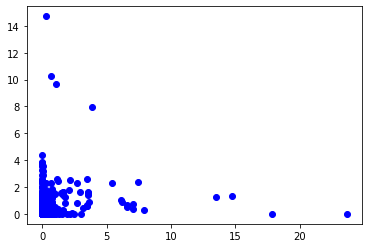

In [1121]:
plt.plot(spent4['amount_spent_y'], spent4['amount_spent_x'],'bo')

In [1122]:
linreg_RMSE_test = np.sqrt(mse(spent4['amount_spent_x'],spent4['amount_spent_y']))


In [1123]:
linreg_RMSE_test

0.8301499792437692

In [1091]:
spent4.shape

(1975, 4)

In [1084]:
spent4[spent4['amount_spent_x']>10]['acc_id']

,acc_id,amount_spent_x,survival_time,amount_spent_y
858,8524,14.720838,1,0.324829
1098,29283,10.247510,1,0.689032
2025,128409,12.339014,64,0.295037
2026,49854,10.962234,1,0.328110
2027,74846,10.849285,58,0.231777
2028,73873,11.871559,64,0.202543
2029,102860,14.688308,64,0.013846
2030,100184,12.546060,21,0.034681
2031,43448,12.004916,64,0.312099
2032,87548,14.968120,64,0.064736


8.32459440044385


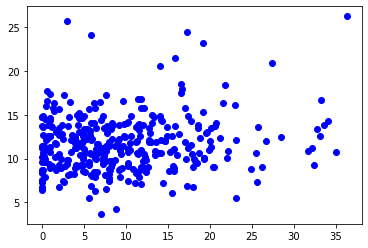

In [1130]:
# 뭐지.. amount_spent를 예측했는데 total spent와 많이 비슷합니다.
g3ex =pd.merge(g3_label,train_label[['acc_id','amount_spent','total_spent']], on = 'acc_id',how='inner')

plt.plot(g3ex['total_spent'],g3ex['amount_spent_x'],'bo')
linreg_RMSE3ex = np.sqrt(mse(g3ex['amount_spent_x'], g3ex['total_spent']))
print(linreg_RMSE3ex)